In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series,DataFrame 
from datetime import date
import datetime as DT
import io
from scipy import stats

from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
%matplotlib inline

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
train_set=pd.read_csv("/content/drive/My Drive/data hack datasets/Datahack/Data_Hack_train_values.csv")
train_labels=pd.read_csv("/content/drive/My Drive/data hack datasets/Datahack/Data_Hack_train_labels.csv")
test_set=pd.read_csv("/content/drive/My Drive/data hack datasets/Datahack/Data_Hack_test_values.csv")




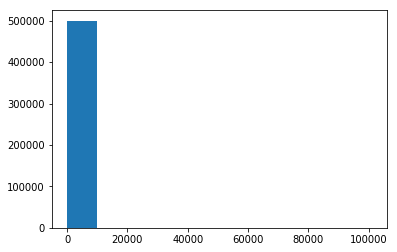

In [0]:
plt.hist(train_set.loan_amount, bins=10)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


TypeError: ignored

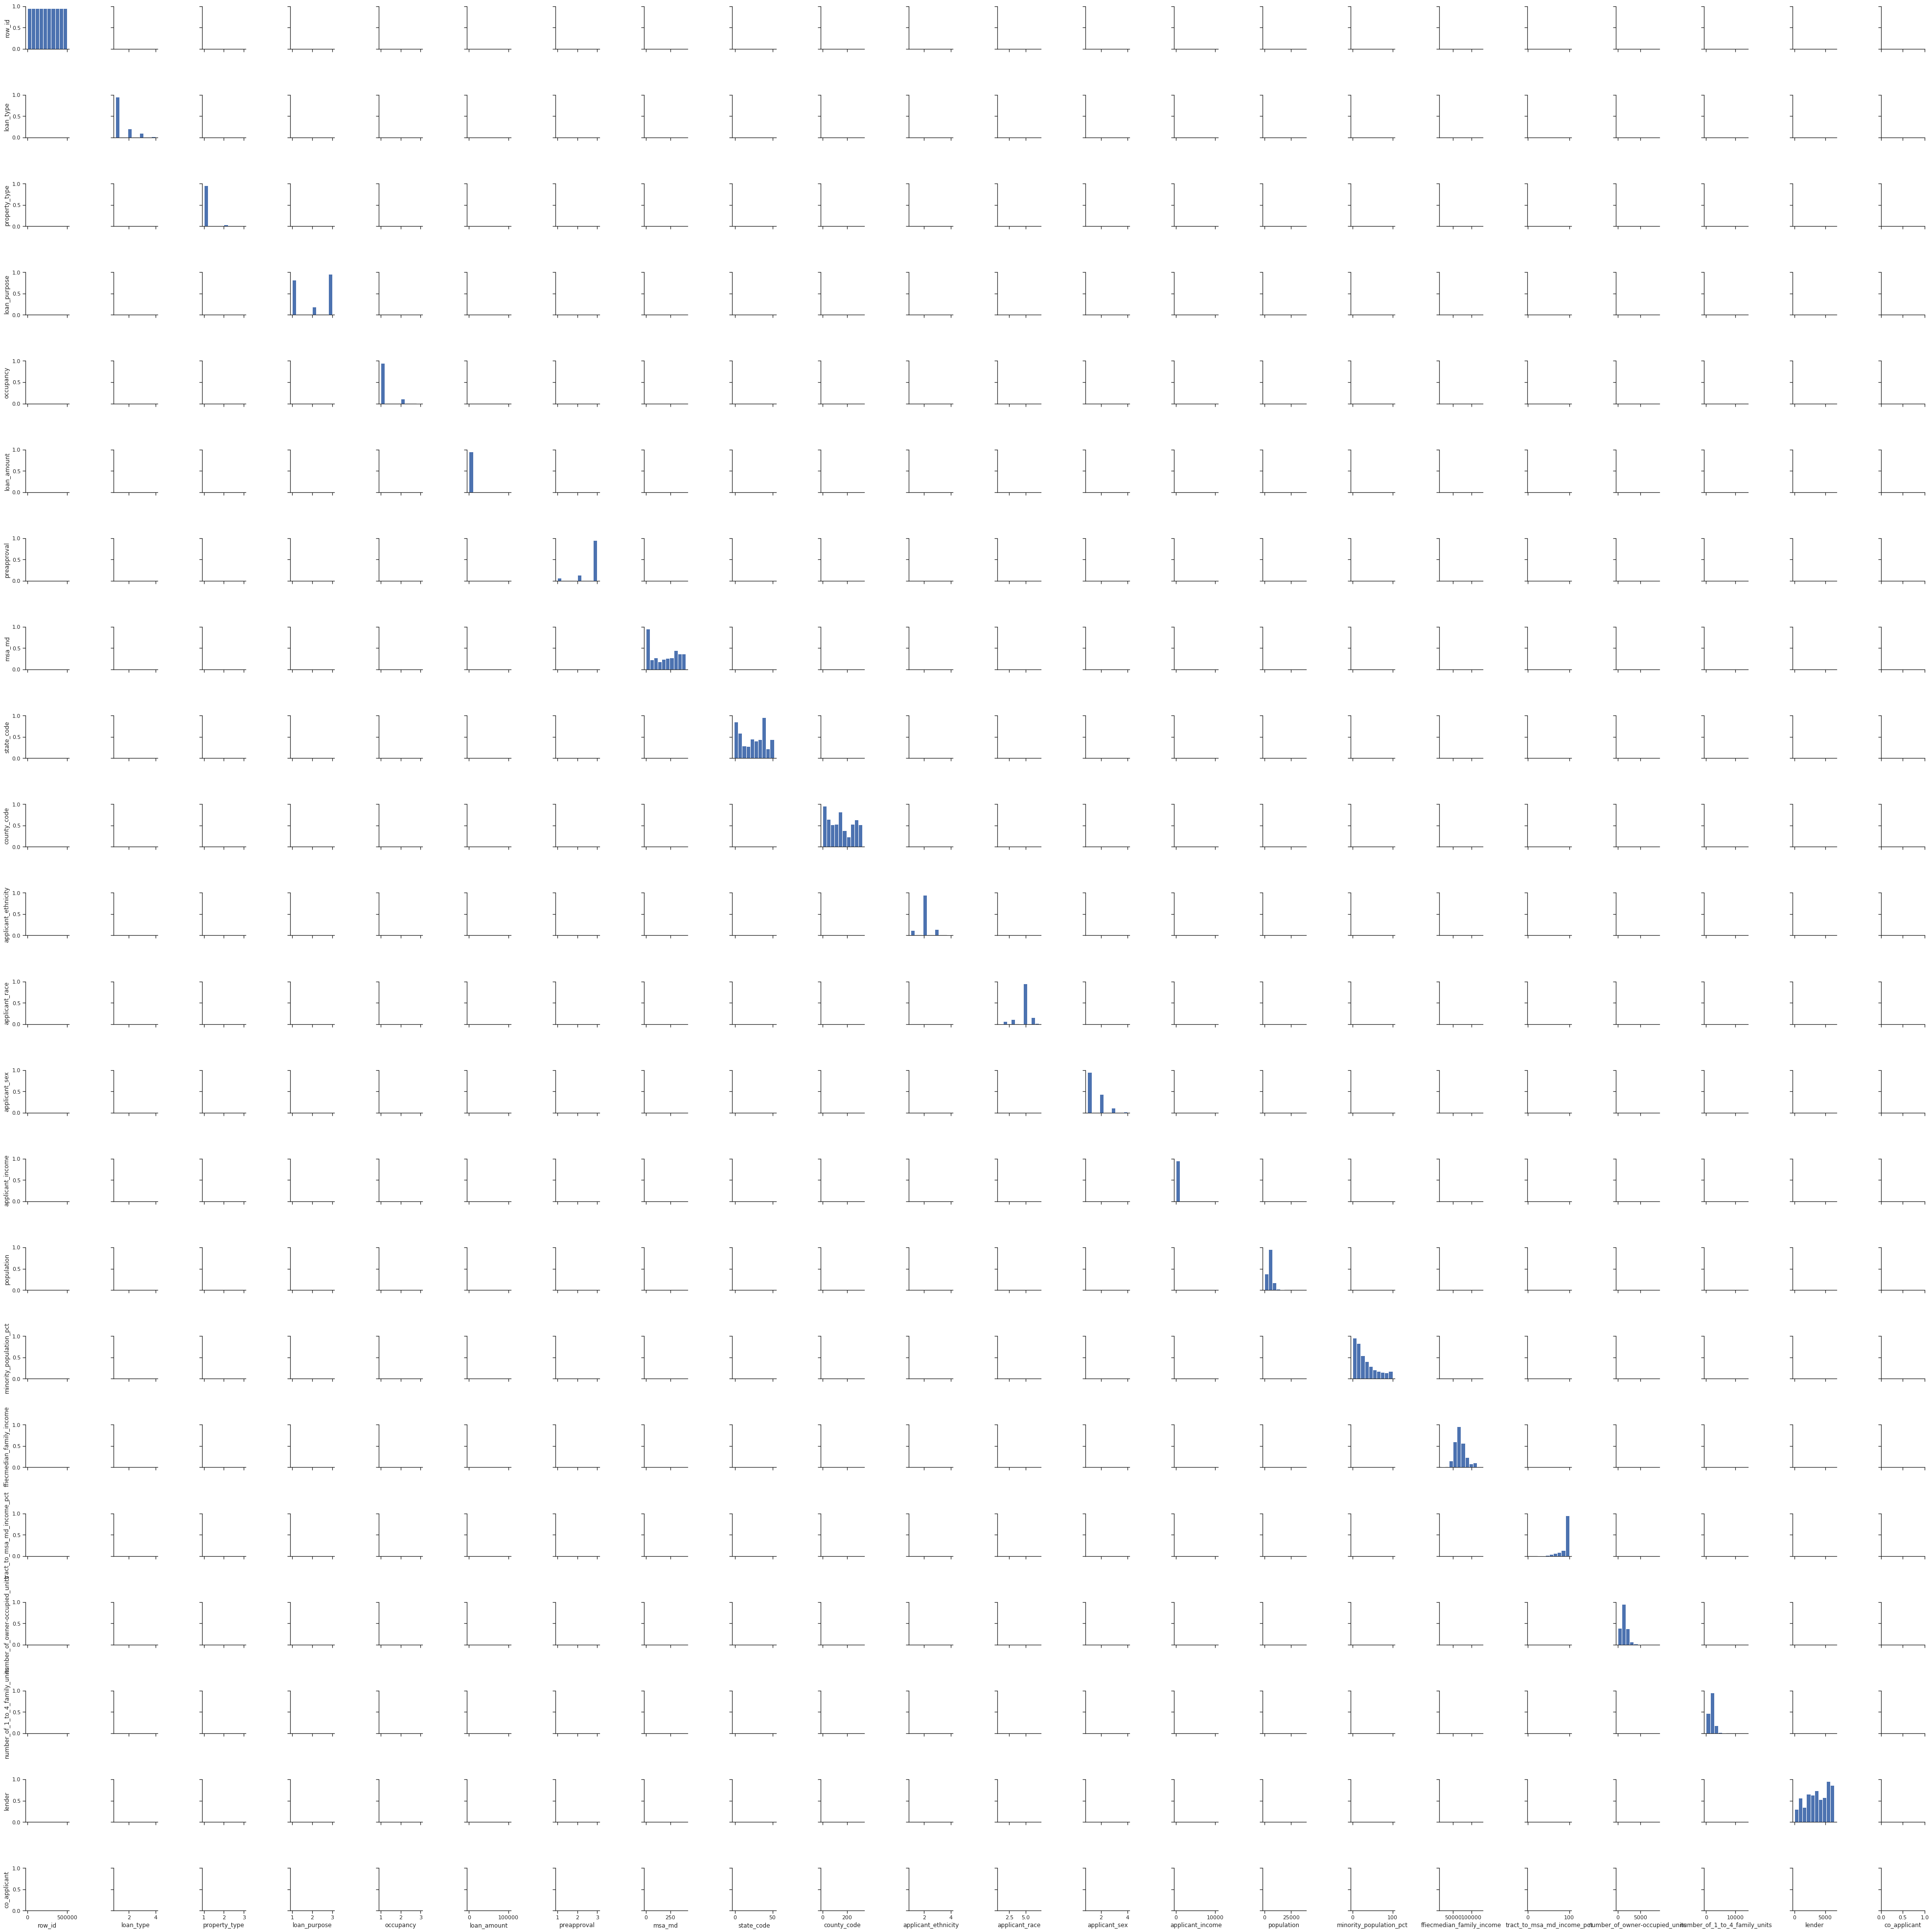

In [0]:
sns.set(style="ticks")

#train_set = sns.load_dataset("train_set")
sns.pairplot(train_set)

In [0]:
#dropping the row_id in train_labels in order to avoid duplication as it already exists in the train_set
train_labels=train_labels.drop(['row_id'], axis=1)


In [0]:
train_set=pd.concat([train_set,train_labels], axis=1)

In [0]:
#Creating and storing our target variable in a seperate dataframe
Accepted=DataFrame(train_set["accepted"])

#Here we want to merge our training and test set but for the columns to be same, we must first take of our target in train
train_set=train_set.drop(['accepted'], axis=1)

#Now we merge BUT first we must create 2 train columns in our test and train set in order to id and seperate them later
train_set['train']=1
test_set['train']=0

combined=pd.concat([train_set, test_set])


In [0]:
#filling some missing vales with MEAN AND MODE as case may be-----TEST SET
cols_fill_missing = ["applicant_income", "population","minority_population_pct","ffiecmedian_family_income","tract_to_msa_md_income_pct","number_of_owner-occupied_units","number_of_1_to_4_family_units"]
combined[cols_fill_missing]=combined[cols_fill_missing].fillna(combined.mean().iloc[0])

In [0]:
#combined[300:600]

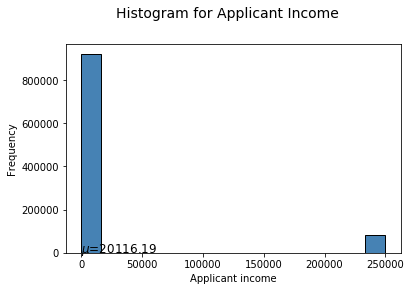

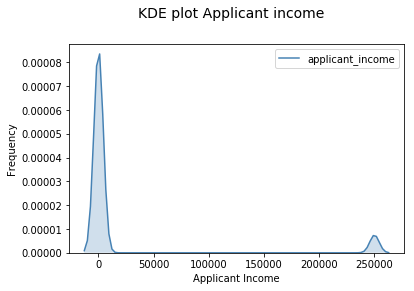

In [0]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Histogram for Applicant Income", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Applicant income")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(combined['applicant_income'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(combined['applicant_income'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("KDE plot Applicant income", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Applicant Income")
ax1.set_ylabel("Frequency") 
sns.kdeplot(combined['applicant_income'], ax=ax1, shade=True, color='steelblue')

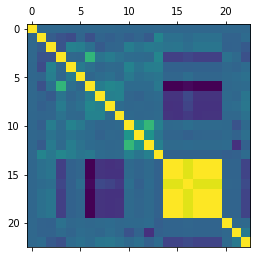

In [0]:
plt.matshow(train_set.corr())
plt.show()

In [0]:
corr=train_set.corr()
corr.style.background_gradient(cmap='coolwarm')

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
row_id,1,0.00271825,-0.000249357,0.00146607,-0.00213724,-0.00264743,0.00103053,0.000497634,0.000548705,-0.00157792,-0.00307463,-0.00242413,-0.0026978,-0.000474849,-0.00315955,-0.0031109,-0.00280887,-0.00310782,-0.00317188,-0.00322368,-0.00132324,0.00121549,0.000433903
loan_type,0.00271825,1,-0.0652145,-0.121296,-0.158964,-0.0185127,-0.133156,-0.0244448,-0.0471844,-0.0163631,-0.050118,-0.0166489,-0.0723719,0.170788,0.0493724,0.047225,0.0194749,0.0471169,0.0473229,0.0478252,-0.0274078,-0.0255017,0.0185894
property_type,-0.000249357,-0.0652145,1,-0.114663,0.156139,0.135923,0.0460347,-0.0760689,-0.0176468,-0.00744517,0.131192,0.0634275,0.106785,0.0980746,0.075048,0.0764901,0.0397706,0.0765573,0.0777891,0.0765598,-0.0357686,-0.029625,-0.0806027
loan_purpose,0.00146607,-0.121296,-0.114663,1,0.0021545,-0.00284664,0.487352,0.0725056,0.118267,0.0581505,0.0233047,0.021642,0.0143222,0.181729,-0.221224,-0.220818,-0.186057,-0.22087,-0.220902,-0.221132,0.0516644,0.0134187,-0.131595
occupancy,-0.00213724,-0.158964,0.156139,0.0021545,1,0.111136,0.0437191,-0.0122705,0.01151,0.00814998,0.159449,0.0667166,0.132245,0.137565,-0.0345826,-0.0318646,-0.0389106,-0.0315646,-0.0319607,-0.0317779,-0.001298,-0.016899,0.0220429
loan_amount,-0.00264743,-0.0185127,0.135923,-0.00284664,0.111136,1,-0.0017958,0.0273068,0.0471681,0.00330437,0.0989361,0.0371453,0.0616365,0.0766299,-0.00936946,-0.00938701,0.0289463,-0.00899715,-0.00821145,-0.00940544,0.0114959,0.0255903,0.0463698
preapproval,0.00103053,-0.133156,0.0460347,0.487352,0.0437191,-0.0017958,1,0.130471,0.184239,0.158625,0.0169959,0.0185779,0.0191847,0.0979534,-0.508042,-0.507912,-0.472224,-0.507604,-0.507122,-0.507516,0.000559411,0.0139201,0.0172086
msa_md,0.000497634,-0.0244448,-0.0760689,0.0725056,-0.0122705,0.0273068,0.130471,1,0.146628,0.160215,-0.0118777,-0.0252211,0.00498906,0.0199497,-0.280482,-0.284104,-0.172652,-0.283891,-0.28287,-0.284075,0.013535,-0.00451696,0.0802876
state_code,0.000548705,-0.0471844,-0.0176468,0.118267,0.01151,0.0471681,0.184239,0.146628,1,0.0201577,-0.00149582,0.00431104,-0.00186006,0.00743576,-0.291602,-0.287472,-0.19964,-0.287405,-0.287918,-0.289566,0.0204342,0.0298378,0.0905339
county_code,-0.00157792,-0.0163631,-0.00744517,0.0581505,0.00814998,0.00330437,0.158625,0.160215,0.0201577,1,0.00564172,-0.0035603,-0.000486202,0.0104284,-0.281117,-0.285037,-0.249226,-0.284617,-0.283767,-0.283447,0.00278077,0.003739,0.0526134


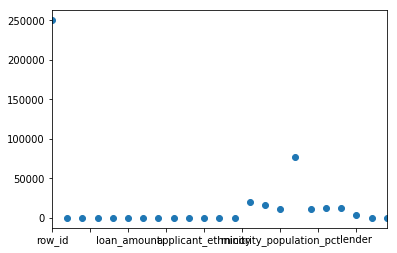

In [0]:
train_set.mean().plot(style='o')

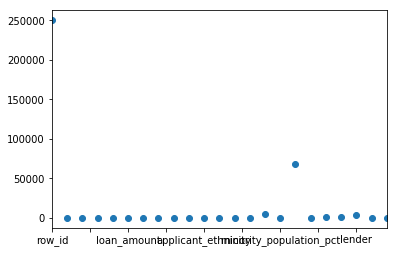

In [0]:
train_set.median().plot(style='o')

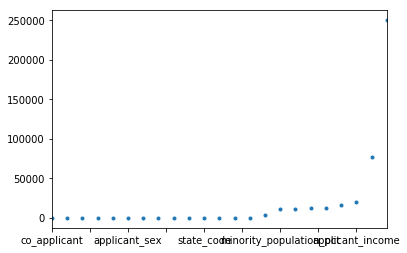

In [0]:
#but when we shuffle our columns , we have

train_set.mean().sort_values().plot(style='.')

In [0]:
#Encoding categorical variables
combined[200:500]

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,train
200,200,1,1,1,1,179.0,3,163.0,2,55.0,1,5,1,186.0,6808.0,38.949,63826.0,100.000,856.0,522.0,6240.0,False,1
201,201,1,1,1,1,243.0,3,278.0,2,208.0,1,5,2,69.0,4960.0,90.998,50265.0,80.986,472.0,646.0,3108.0,False,1
202,202,1,1,1,2,149.0,1,182.0,37,131.0,2,5,1,82.0,5036.0,24.000,68133.0,100.000,1345.0,1775.0,4701.0,True,1
203,203,1,3,3,2,321.0,3,18.0,37,56.0,3,6,3,76.0,4462.0,47.261,59295.0,76.815,1015.0,1565.0,2863.0,False,1
204,204,1,1,1,2,134.0,3,50.0,15,158.0,2,5,1,59.0,2826.0,9.148,70789.0,100.000,808.0,1172.0,684.0,True,1
205,205,1,1,3,1,104.0,3,217.0,37,296.0,2,3,2,41.0,3954.0,91.063,61147.0,90.951,783.0,1025.0,2839.0,False,1
206,206,1,1,1,1,591.0,3,318.0,37,274.0,2,2,2,76.0,11981.0,64.971,84860.0,100.000,1369.0,1994.0,3068.0,True,1
207,207,1,1,1,1,195.0,2,1.0,2,246.0,2,5,2,76.0,6483.0,30.876,58192.0,96.642,1659.0,2976.0,2702.0,True,1
208,208,1,1,3,1,64.0,3,27.0,35,31.0,2,5,2,62.0,2233.0,39.243,74351.0,47.101,611.0,973.0,6025.0,False,1
209,209,1,1,3,1,203.0,3,10.0,34,259.0,2,5,2,84.0,2967.0,30.962,87987.0,77.789,835.0,1534.0,3814.0,False,1


In [0]:
#cleaning missing values i.e replacing missing values with nan
#CONVERTS NEGATIVE NUMBERS TO nan:
combined["msa_md"].loc[combined["msa_md"]<0]=182.0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["county_code"].loc[combined["county_code"]<0]=combined["county_code"].median()


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["state_code"].loc[combined["state_code"]<0]=37


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["lender"].median()
combined["lender"].loc[combined["lender"]<0]=3718.0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["loan_amount"].mean()
combined["loan_amount"].loc[combined["loan_amount"]<0]=222.0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["loan_type"].mode()
combined["loan_type"].loc[combined["loan_type"]<0]=1


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["property_type"].mode()
combined["property_type"].loc[combined["property_type"]<0]=1


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["loan_purpose"].mode()
combined["loan_purpose"].loc[combined["loan_purpose"]<0]=3


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["occupancy"].mode()
combined["occupancy"].loc[combined["occupancy"]<0]=1


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["preapproval"].mode()
combined["preapproval"].loc[combined["preapproval"]<0]=3


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["applicant_income"].median()
combined["applicant_income"].loc[combined["applicant_income"]<0]=79
combined["applicant_income"].loc[combined["applicant_income"]>240000]=79

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["population"].median()
combined["population"].loc[combined["population"]<0]=5099
combined["population"].loc[combined["population"]>240000]=5099

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["minority_population_pct"].median()
combined["minority_population_pct"].loc[combined["minority_population_pct"]<0]=25
combined["minority_population_pct"].loc[combined["minority_population_pct"]>240000]=25

	


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["ffiecmedian_family_income"].median()
combined["ffiecmedian_family_income"].loc[combined["ffiecmedian_family_income"]<0]=68648
combined["ffiecmedian_family_income"].loc[combined["ffiecmedian_family_income"]>240000]=68648	

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["tract_to_msa_md_income_pct"].median()
combined["tract_to_msa_md_income_pct"].loc[combined["tract_to_msa_md_income_pct"]<0]=100
combined["tract_to_msa_md_income_pct"].loc[combined["tract_to_msa_md_income_pct"]>240000]=100	

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["number_of_owner-occupied_units"].median()
combined["number_of_owner-occupied_units"].loc[combined["number_of_owner-occupied_units"]<0]=1364
combined["number_of_owner-occupied_units"].loc[combined["number_of_owner-occupied_units"]>240000]=1364

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["number_of_1_to_4_family_units"].median()
combined["number_of_1_to_4_family_units"].loc[combined["number_of_1_to_4_family_units"]<0]=1797
combined["number_of_1_to_4_family_units"].loc[combined["number_of_1_to_4_family_units"]>240000]=1797

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["applicant_ethnicity"].mode()
combined["applicant_ethnicity"].loc[combined["applicant_ethnicity"]<0]=2
combined["applicant_ethnicity"].loc[combined["applicant_ethnicity"]>240000]=2

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["applicant_race"].median()
combined["applicant_race"].loc[combined["applicant_race"]<0]=5
combined["applicant_race"].loc[combined["applicant_race"]>240000]=5

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
combined["applicant_sex"].median()
combined["applicant_sex"].loc[combined["applicant_sex"]<0]=1
combined["applicant_sex"].loc[combined["applicant_sex"]>240000]=1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
#checking if there is any missing value in our dataframe
combined.isnull().values.any()
combined.isnull().any()

row_id                            False
loan_type                         False
property_type                     False
loan_purpose                      False
occupancy                         False
loan_amount                       False
preapproval                       False
msa_md                            False
state_code                        False
county_code                       False
applicant_ethnicity               False
applicant_race                    False
applicant_sex                     False
applicant_income                  False
population                        False
minority_population_pct           False
ffiecmedian_family_income         False
tract_to_msa_md_income_pct        False
number_of_owner-occupied_units    False
number_of_1_to_4_family_units     False
lender                            False
co_applicant                      False
train                             False
dtype: bool

In [0]:
len(combined['applicant_sex'].unique())

4

In [0]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            1000000 non-null int64
loan_type                         1000000 non-null int64
property_type                     1000000 non-null int64
loan_purpose                      1000000 non-null int64
occupancy                         1000000 non-null int64
loan_amount                       1000000 non-null float64
preapproval                       1000000 non-null int64
msa_md                            1000000 non-null float64
state_code                        1000000 non-null int64
county_code                       1000000 non-null float64
applicant_ethnicity               1000000 non-null int64
applicant_race                    1000000 non-null int64
applicant_sex                     1000000 non-null int64
applicant_income                  1000000 non-null float64
population                        1000000 non-null float64
minority_population_pct

In [0]:
#ENCODINGS GET DUMMIES STARTS HERE

#NOW WE ENCODE
combined1=pd.get_dummies(combined['msa_md'], drop_first=True)
#now we encode
combined2=pd.get_dummies(combined['state_code'], drop_first=True)
#now we encode
combined3=pd.get_dummies(combined['county_code'], drop_first=True)


combined4=pd.get_dummies(combined['loan_type'], drop_first=True)
#now we encode
combined5=pd.get_dummies(combined['property_type'], drop_first=True)
#now we encode
combined6=pd.get_dummies(combined['loan_purpose'], drop_first=True)


combined7=pd.get_dummies(combined['occupancy'], drop_first=True)
#now we encode
combined8=pd.get_dummies(combined['preapproval'], drop_first=True)
#now we encode
combined9=pd.get_dummies(combined['applicant_ethnicity'], drop_first=True)

combined10=pd.get_dummies(combined['applicant_race'], drop_first=True)
#now we encode
combined11=pd.get_dummies(combined['applicant_sex'], drop_first=True)
#now we encode
combined12=pd.get_dummies(combined['co_applicant'], drop_first=True)


In [0]:
combined.shape

(1000000, 23)

In [0]:
#now we combine all datasets together
combined=pd.concat([combined,combined1,combined2,combined3,combined4,combined5,combined6,combined7,combined8,combined9,combined10,combined11,combined12], axis=1)

In [0]:
#i am now dropping the string/object/boolean categorical features cos they have been converted to dummies
combined=combined.drop([ 'msa_md','state_code','county_code', 'loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval','applicant_ethnicity', 'applicant_race', 'applicant_sex','co_applicant','row_id'], axis=1)


In [0]:
combined.shape

(1000000, 815)

In [0]:
#Now its time to separate those two datasets and we are done with both the train and test set now 
#containing the same number of columns.
train_df=combined[combined['train']==1]
test_df=combined[combined['train']==0]
#we now drop the train columns we created in test and train set
train_df.drop(['train'], axis=1, inplace=True)
test_df.drop(['train'], axis=1, inplace=True)



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
#now we combine back our target to our train set together
train_df=pd.concat([train_df,Accepted], axis=1)

In [0]:
# Predicting the Test set results and converting to csv
prediction = pd.DataFrame(train_df).to_csv('prediction42.csv')


In [0]:
# Predicting the Test set results and converting to csv
prediction = pd.DataFrame(test_df).to_csv('datahack_test.csv')

In [0]:
train_df.shape

(500000, 815)

In [0]:
test_df.shape

(500000, 814)

In [0]:
#Splitting  the dataset into X and y
X = train_df.iloc[:, 0:814].values
y = train_df.iloc[:, -1].values


In [0]:
# Splitting the dataset into the Training set and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Here we are generating our synthetic points to balance the scarce class using the SMOTE method
#from imblearn.over_sampling import SMOTE
#sm=SMOTE(random_state=11, ratio=1.0)
#X_train, y_train = sm.fit_sample(X_train, y_train)

#Then we shuffle cos the new rows are mostimes jampacked together
#from sklearn.utils import shuffle
#X_train,y_train= shuffle(X_train,y_train)

#we statndard scale(note as fi score and presicion increased as soon as i standard scalled )
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
test_df = sc_X.transform(test_df)

from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
